In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Upwork/Upwork_Singer.csv",
   "../../Raw_CSV/April 27 - 2022/Upwork/Upwork-Singer.csv",
    "../../Raw_CSV/April 28 - 2022/Upwork/Upwork-Singer.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")

/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_4807/3668146596.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")


In [4]:
merge

,Title,Description,Location,Skill,Est.Proj-Budget,Job Type,Contractor Tier,Duration
0,Searching for singer,"Iam searching for some singer, who can bring s...",None,"Singing', 'English', 'Voice Acting', 'Voice Re...",None,Hourly: $18.00-$25.00,Expert,"1 to 3 months, Less than 30 hrs/week"
1,Vocals & Music Composition for a Kids Channel,"We are looking for a Talented, Energetic Sound...",None,"Singing', 'Music', 'Music Writing', 'Music Pro...",None,Hourly: $19.50-$40.00,Expert,"More than 6 months, Less than 30 hrs/week"
2,"Singing children's songs in German, Arabic, Pu...",I need a singer to sing a few brief basic/trad...,None,Singing,\n $23\n,Fixed-price,Entry level,None
3,Acoustic composer and singer,"Hi, I’ve written lyrics for a Mother’s Day son...",None,"Singing', 'Male', 'Female', 'Acoustic Music', ...",\n $200\n,Fixed-price,Intermediate,None
4,Diss Track,Looking to get a full diss track made. I am a ...,None,"Singing', 'Songwriting', 'Ghostwriting', 'Rap'...",None,Hourly,Intermediate,"Less than 1 month, Less than 30 hrs/week"
...,...,...,...,...,...,...,...,...
235,Animated Voice Acting Series,THIS IS A TEMPORARY NON-PROFIT PROJECTThe Rise...,None,"Singing', 'Soundtrack', 'Female', 'English', '...",None,Hourly,Intermediate,"More than 6 months, Less than 30 hrs/week"
236,Need Help with Marketing for a Music Artist,"Hello, I need help with marketing for a music ...",None,"Singing', 'Soundtrack', 'Female', 'English', '...",None,Hourly: $10.00-$36.00,Expert,"More than 6 months, 30+ hrs/week"
237,"Instagram, Facebook and YouTube followers",I am a music artist based in europe hip hop af...,None,"Singing', 'Soundtrack', 'Female', 'English', '...",None,Hourly: $10.00-$36.00,Expert,"More than 6 months, Less than 30 hrs/week"
238,BOLLYWOOD + ARAB + MODERN STYLE // Music Produ...,You must understand Indian/Bollywood style mus...,None,"Singing', 'Soundtrack', 'Female', 'English', '...",None,Hourly: $19.50-$40.00,Expert,"Less than 1 month, Less than 30 hrs/week"


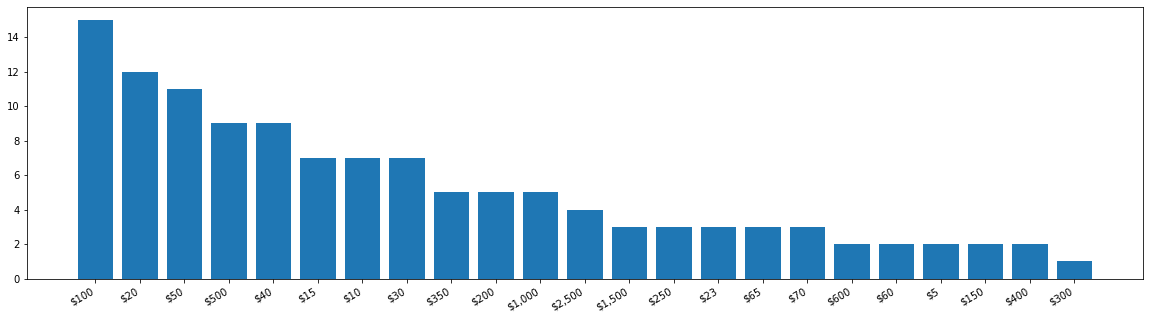

In [5]:
merge["Est.Proj-Budget"] = merge["Est.Proj-Budget"].str.strip()
filt = (merge["Est.Proj-Budget"] != "None") & (merge["Est.Proj-Budget"].notna())
filter_est = merge.loc[filt]
count_est = filter_est["Est.Proj-Budget"].value_counts()
plt.figure(figsize=(20, 5))
plt.bar(count_est.index, count_est.values)
plt.xticks(rotation=30, ha="right")
plt.show()

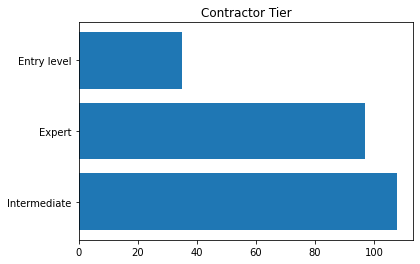

In [6]:
count_ct = merge["Contractor Tier"].value_counts()
plt.barh(count_ct.index, count_ct.values)
plt.title("Contractor Tier")
plt.show()

In [7]:
merge['Skill'] = merge["Skill"].str.replace("'","")
merge['Skill'] = merge["Skill"].str.split(",")

In [8]:
skill_append = []
for skill in range(len(merge['Skill'])):
    skill = merge['Skill'][skill]
    for j in range(len(skill)):
        skill_append.append(str(skill[j]).strip())

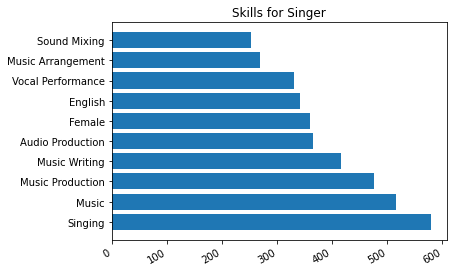

In [21]:
skill_frame = pd.DataFrame(skill_append,columns=["Skill"])
count_skill = skill_frame["Skill"].value_counts()[0:10]
plt.barh(count_skill.index, count_skill.values)
plt.title("Skills for Singer")
plt.xticks(rotation="30",ha="right")
plt.show()

In [10]:
count_skill

Singing              579
Music                516
Music Production     476
Music Writing        416
Audio Production     365
Female               359
English              341
Vocal Performance    330
Music Arrangement    268
Sound Mixing         252
Name: Skill, dtype: int64

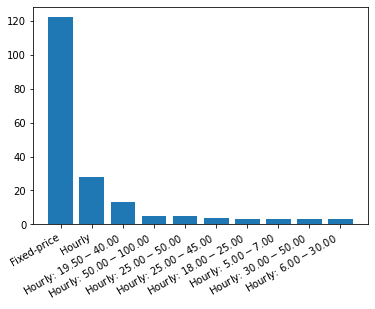

In [11]:
job_type = merge["Job Type"].value_counts()[0:10]
plt.bar(job_type.index, job_type.values)
plt.xticks(rotation="30",ha="right")
plt.show()

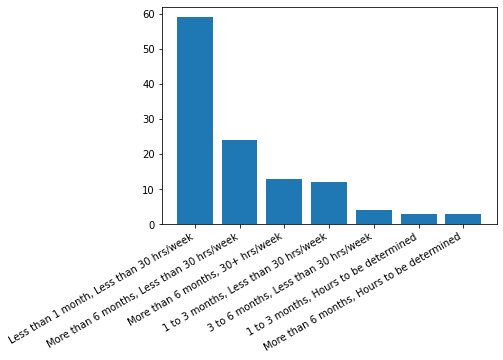

In [12]:
filt = (merge["Duration"] != "None")
filter_duration = merge.loc[filt,"Duration"]
count_duration = filter_duration.value_counts()
plt.bar(count_duration.index, count_duration.values)
plt.xticks(rotation="30",ha="right")
plt.show()


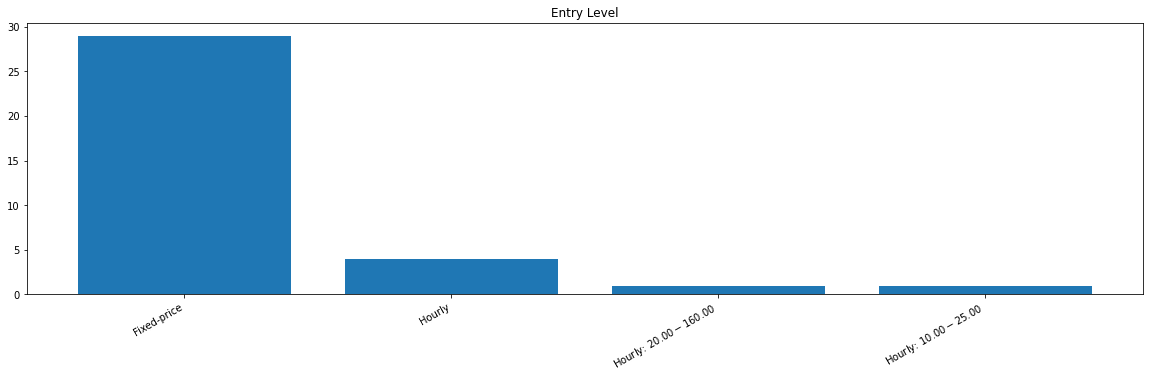

In [13]:
filt = (merge["Contractor Tier"] == "Entry level")
count_entry_level = merge.loc[filt,"Job Type"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Entry Level")
plt.xticks(rotation="30", ha="right")
plt.show()


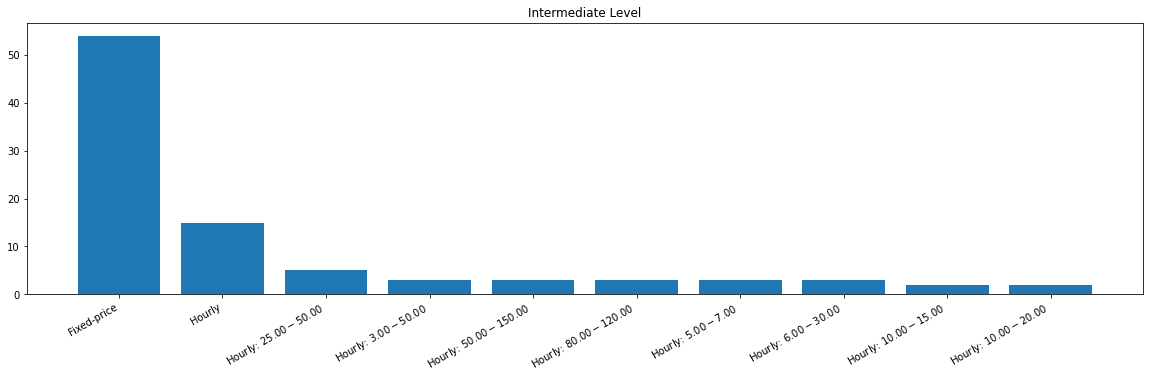

In [14]:
filt = (merge["Contractor Tier"] == "Intermediate")
count_entry_level = merge.loc[filt,"Job Type"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Intermediate Level")
plt.xticks(rotation="30", ha="right")
plt.show()

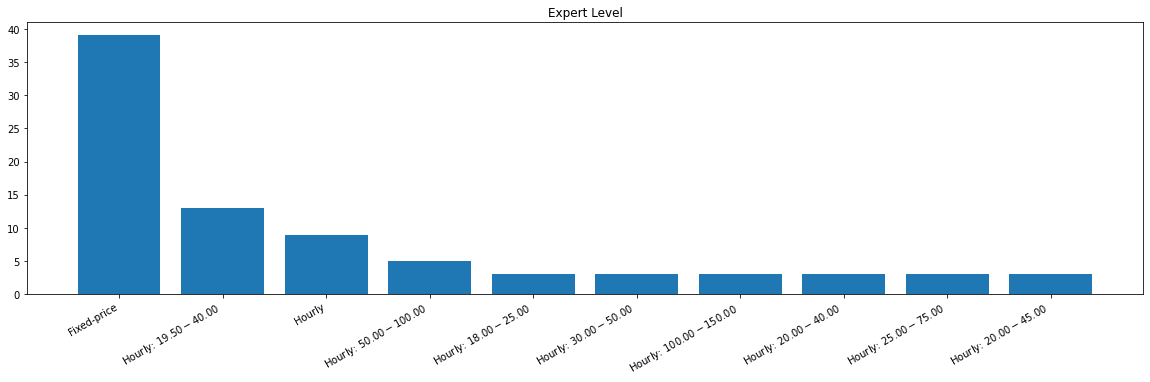

In [15]:
filt = (merge["Contractor Tier"] == "Expert")
count_entry_level = merge.loc[filt,"Job Type"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Expert Level")
plt.xticks(rotation="30", ha="right")
plt.show()

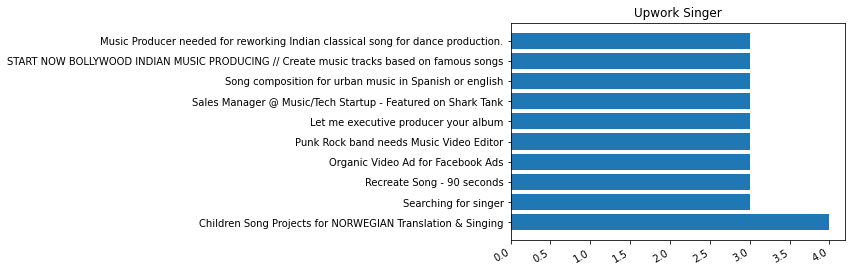

In [16]:
count_job_title = merge["Title"].value_counts()[0:10]
plt.barh(count_job_title.index, count_job_title.values)
plt.title("Upwork Singer")
plt.xticks(rotation="30",ha="right")
plt.show()

In [18]:
merge["Location"].value_counts()

None    240
Name: Location, dtype: int64